Here we can take a look at some of the properties of our data.  

We will look at 1000 samples and see the vocabulary and characters used.

In [1]:
from patentdata.corpus import USPublications
from collections import Counter

path = '/media/SAMSUNG1/Patent_Downloads'
ds = USPublications(path)

In [2]:
# If data exists load, else generate
import os
import pickle

PIK = "pickle.dat"

if os.path.isfile(PIK):
    with open(PIK, "rb") as f:
        print("Loading data")
        total_token_counter, total_char_counter = pickle.load(f)
        
else:
    doc_generator = ds.patentdoc_generator(classification=["G", "06"], publication_numbers=None, sample_size=1000)
    total_token_counter = Counter()
    total_char_counter = Counter()
    for doc in doc_generator:
        total_token_counter += doc.unfiltered_counter
        total_char_counter += doc.character_counter
    
    data = (total_token_counter, total_char_counter)

    with open(PIK, "wb") as f:
        pickle.dump(data, f)

Loading data


In [3]:
print("Total Number of Tokens (vocabulary) = {0}".format(len(total_token_counter)))
print("Total Number of Characters (vocabulary) = {0}".format(len(total_char_counter)))

Total Number of Tokens (vocabulary) = 100435
Total Number of Characters (vocabulary) = 287


In [4]:
total_char_counter

Counter({'\n': 313476,
         ' ': 9808516,
         '!': 199,
         '#': 693,
         '$': 774,
         '%': 1613,
         '&': 581,
         "'": 11461,
         '(': 101062,
         ')': 102591,
         '*': 1527,
         '+': 4470,
         ',': 531591,
         '-': 116307,
         '.': 463065,
         '/': 33970,
         '0': 249335,
         '1': 276486,
         '2': 185829,
         '3': 104958,
         '4': 100630,
         '5': 77638,
         '6': 73015,
         '7': 43646,
         '8': 54356,
         '9': 33963,
         ':': 20198,
         ';': 34201,
         '<': 2353,
         '=': 7826,
         '>': 2509,
         '?': 308,
         '@': 191,
         'A': 109076,
         'B': 36929,
         'C': 58999,
         'D': 55537,
         'E': 38942,
         'F': 97468,
         'G': 63638,
         'H': 17090,
         'I': 172158,
         'J': 4651,
         'K': 5595,
         'L': 35290,
         'M': 48941,
         'N': 30199,
         'O': 358

In [5]:
total_char_counter.most_common(100)

[(' ', 9808516),
 ('e', 6309526),
 ('t', 4594275),
 ('a', 3856608),
 ('i', 3797413),
 ('o', 3599920),
 ('n', 3582786),
 ('r', 3249892),
 ('s', 3018913),
 ('c', 2029536),
 ('d', 1889379),
 ('h', 1822660),
 ('l', 1665489),
 ('m', 1466382),
 ('p', 1252953),
 ('u', 1204876),
 ('f', 1050703),
 ('g', 917543),
 ('b', 660881),
 ('y', 640928),
 (',', 531591),
 ('v', 523576),
 ('.', 463065),
 ('w', 453487),
 ('\n', 313476),
 ('1', 276486),
 ('0', 249335),
 ('2', 185829),
 ('I', 172158),
 ('k', 170921),
 ('x', 144472),
 ('T', 143100),
 ('-', 116307),
 ('A', 109076),
 ('3', 104958),
 (')', 102591),
 ('(', 101062),
 ('4', 100630),
 ('F', 97468),
 ('S', 88394),
 ('5', 77638),
 ('6', 73015),
 ('q', 68089),
 ('P', 68079),
 ('G', 63638),
 ('C', 58999),
 ('D', 55537),
 ('8', 54356),
 ('M', 48941),
 ('R', 44023),
 ('7', 43646),
 ('z', 40751),
 ('E', 38942),
 ('j', 38896),
 ('B', 36929),
 ('O', 35899),
 ('L', 35290),
 (';', 34201),
 ('/', 33970),
 ('9', 33963),
 ('N', 30199),
 ('U', 25225),
 ('“', 22080),

Based on the characters above limiting to printable characters seems a good compromise. We loose the maths symbols and greek variable names though.

A more clever replacement would be to apply a mapping that maps out of vocab characters to their nearest character equivalent (e.g. alpha to 'a', the variety of equals to = or <>, accents to unaccented letters etc.).

In [6]:
total_token_counter.most_common(100)

[('the', 757112),
 (',', 525440),
 ('.', 410518),
 ('a', 343042),
 ('of', 342584),
 ('to', 261987),
 ('and', 209942),
 ('in', 158468),
 ('is', 155152),
 (')', 102591),
 ('(', 101062),
 ('be', 100304),
 ('for', 99248),
 ('or', 92516),
 ('The', 83798),
 ('an', 80615),
 ('may', 77584),
 ('that', 74525),
 ('data', 67454),
 ('as', 67006),
 ('by', 63512),
 ('with', 59309),
 ('system', 52865),
 ('are', 50213),
 ('on', 48689),
 ('one', 47230),
 ('from', 46835),
 ('information', 45658),
 ('FIG', 44768),
 ('In', 39862),
 ('user', 39321),
 ('can', 37965),
 ('device', 37193),
 ('at', 36969),
 ('which', 35193),
 (';', 34201),
 ('example', 31794),
 ('image', 31535),
 ('such', 27587),
 ('first', 27294),
 ('not', 27152),
 ('invention', 24565),
 ('method', 24518),
 ('other', 24480),
 ('embodiment', 24192),
 ('each', 24041),
 ('more', 23716),
 ('“', 22080),
 ('”', 22052),
 ('1', 21818),
 ('computer', 21671),
 ('processing', 21065),
 ('second', 20449),
 ('network', 20153),
 ('wherein', 20017),
 ('present

We can maybe have lower case tokens if we introduce a <CAPITAL> token that is inserted before the word.  

Another idea is to use a stemmer but to add back in the ending as an extra token.  Similar to the word pieces in Google's Neural Machine Translate. Porter stemmer in NLTK just takes the word and stems it - we need to do a bit of algorithmic magic to get the ending.

In [7]:
total_token_counter.most_common()[:-1000-1:-1] 

[('provably', 1),
 ('6,769,080', 1),
 ('P1=P2=P', 1),
 ('advocates', 1),
 ('E2=4', 1),
 ('Sr660', 1),
 ('host-device', 1),
 ('office—without', 1),
 ('Shadowing', 1),
 ('Auto-focus/auto-zoom', 1),
 ('7,093,923', 1),
 ('Indentations', 1),
 ('research/work', 1),
 ('Primetime', 1),
 ('electronically-erasable', 1),
 ('·y', 1),
 ('secure-data', 1),
 ('Data_path_time', 1),
 ('818-821', 1),
 ('Market-Development', 1),
 ('TRIMS', 1),
 ('Postmigrated', 1),
 ('2409', 1),
 ('chasses', 1),
 ('324′', 1),
 ('sparingly', 1),
 ('1568a-1568k', 1),
 ('Sastry', 1),
 ('3088', 1),
 ('DeLand', 1),
 ('OLDEST', 1),
 ('6,604,810', 1),
 ('CS-04', 1),
 ('53,400,000', 1),
 ('crosswise', 1),
 ('Company.', 1),
 ('four-eye', 1),
 ('sum—for', 1),
 ('Test05', 1),
 ('11/285,074', 1),
 ('pre-signed', 1),
 ('2824', 1),
 ('7,429,096', 1),
 ('overdrafts—such', 1),
 ('sterile.', 1),
 ('5,574,962', 1),
 ('xTime', 1),
 ('Ambiguities', 1),
 ('non-identification', 1),
 ('grammarElement', 1),
 ('Month-to-date', 1),
 ('Expanded', 

Observation: lots of these are hyphens, maths, reference numerals or patent documents.

Do we UNK these? Or convert them in some other way.

Replace patent numbers with <PATENT_NUMBER>.

Replace hyphen words with the two separate words (and <HYPHEN> token inserted before hand).

Replace slash words (e.g. I/O) with two separate words (and <SLASH> token inserted before hand) - but and/or probably best left as one token).

If punctuation in token split on punctuation.
Regex strings for patent numbers: "

In [8]:
# Threshold tokens based on frequency
# threshold = 1
for threshold in range (0, 10):
    filtered_token_counter = Counter({k: c for k, c in total_token_counter.items() if c > threshold})
    print("Filtering out frequencies less than or equal to {0} returns {1} unique tokens".format(threshold, len(filtered_token_counter)))

Filtering out frequencies less than or equal to 0 returns 100435 unique tokens
Filtering out frequencies less than or equal to 1 returns 56278 unique tokens
Filtering out frequencies less than or equal to 2 returns 43106 unique tokens
Filtering out frequencies less than or equal to 3 returns 36227 unique tokens
Filtering out frequencies less than or equal to 4 returns 31654 unique tokens
Filtering out frequencies less than or equal to 5 returns 28571 unique tokens
Filtering out frequencies less than or equal to 6 returns 26232 unique tokens
Filtering out frequencies less than or equal to 7 returns 24386 unique tokens
Filtering out frequencies less than or equal to 8 returns 22836 unique tokens
Filtering out frequencies less than or equal to 9 returns 21556 unique tokens


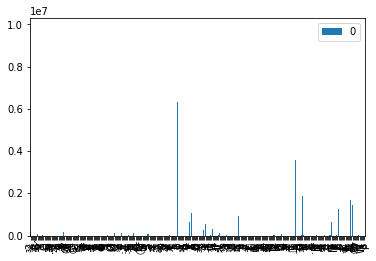

In [9]:
import pandas
%matplotlib inline  
df = pandas.DataFrame.from_dict(total_char_counter, orient='index')
df.plot(kind='bar')

In [44]:
# See what encoding is being used for our characters
length_1 = [c for c in total_char_counter.keys() if len(c.encode('UTF-8')) == 1]
length_2 = [c for c in total_char_counter.keys() if len(c.encode('UTF-8')) == 2]
length_3_plus = [c for c in total_char_counter.keys() if len(c.encode('UTF-8')) > 2]

print(length_1, "\n\n", length_2, "\n\n", length_3_plus, "\n\n")

ords = [ord(c) for c in total_char_counter.keys()]

print(ords)

['2', '8', 'Y', 'u', '6', 's', 'k', '@', 'J', '_', 't', 'P', '[', '\\', ']', '?', ')', '4', 'r', 'Z', '>', '9', 'A', 'B', 'i', 'w', '5', 'S', 'c', 'C', '*', '%', ':', '0', 'x', 'F', '^', 'e', '/', 'v', 'y', '$', 'f', '1', ',', '|', '\n', '(', 'L', 'T', 'V', '.', 'j', 'n', '-', 'g', '!', '}', 'a', '=', 'Q', '<', 'N', 'H', 'G', ' ', '#', '~', 'E', 'I', 'o', '3', 'O', 'd', 'K', '{', 'q', 'R', 'D', 'X', 'h', "'", '+', 'z', 'b', 'M', '7', 'p', 'U', '&', 'l', 'm', ';', 'W'] 

 ['γ', '̂', 'Ω', '±', 'ü', 'Φ', 'í', 'ϕ', 'é', '½', '¥', '¾', '·', '©', 'ú', 'τ', 'Ŷ', 'θ', 'π', 'ô', 'Σ', 'ω', 'Ø', 'ρ', '˜', 'ó', 'Ψ', 'ƒ', 'ä', 'λ', '¢', 'ν', 'ŷ', 'ξ', 'φ', 'â', 'υ', '¼', 'σ', 'ñ', 'Θ', 'ĝ', '°', 'χ', 'ɛ', 'ˆ', '§', 'ö', 'ŝ', '×', '\xa0', 'ū', 'Ī', 'å', 'Γ', 'Ē', 'μ', 'µ', '£', 'Ĩ', 'Ŝ', 'ε', 'ψ', 'Ĉ', 'è', 'Λ', 'δ', '¶', 'κ', 'à', 'α', 'Δ', 'ē', 'ζ', '÷', 'η', '®', 'ç', 'Π', 'á', 'β'] 

 ['⅗', '└', '“', '∓', '≅', '\uf605', '″', '\uf606', '≥', '⋯', '\ue85c', '┘', '⅔', '⌊', '⋁', '≧', '〈', '┐', '⋄', '

In [50]:
print(ord('\n'), ord('\t'))

10 9


In [48]:
len(length_3_plus)

112

In [34]:
total_char_counter.keys()

dict_keys(['2', '⅗', '└', '“', '∓', '≅', '8', '\uf605', 'γ', '″', 'Y', '\uf606', '̂', 'Ω', '±', 'ü', '≥', 'Φ', 'í', '⋯', 'u', '\ue85c', '┘', '⅔', 'ϕ', '6', 's', '⌊', 'k', 'é', '⋁', '@', '½', 'J', '¥', '¾', '·', '©', 'ú', '≧', '〈', '_', '┐', '⋄', '⅙', 't', '∉', 'τ', '⊃', 'P', 'Ŷ', 'θ', '≢', 'π', '•', 'ô', '∮', 'Σ', '\ue2d3', '⩔', '∀', '●', '\ue2fa', '[', '\u2062', '\\', ']', '?', '⋂', 'ω', 'Ø', '\uf74c', ')', '⇔', '\u2009', '≈', 'ρ', 'ⅇ', '4', '⋮', 'r', 'Z', '←', '\ue52a', '>', '⇀', '9', '\ue8a0', 'A', '⫬', '˜', 'ó', '\uf603', 'B', 'Ψ', '◯', 'ƒ', 'i', 'w', '’', '5', 'S', 'ä', '≤', 'c', 'C', '∼', '*', 'λ', '〉', '–', '¢', '⅕', 'ν', '%', '√', 'ŷ', '⇒', '★', ':', 'ξ', '0', 'x', 'F', '^', '∥', 'e', 'φ', '\u2003', '/', '⨯', 'â', 'υ', '¼', 'σ', 'v', 'y', '$', 'f', 'Å', 'ñ', '\uf604', 'Θ', 'ĝ', '\u2002', '°', '\ue535', '⅜', '1', 'χ', ',', '|', '\ue3ac', 'ɛ', '”', '∏', '\n', '⅞', '(', '∫', 'ˆ', 'L', 'T', 'V', '⅝', '.', '§', '⅘', 'j', 'ö', '∘', 'n', '⅛', 'ŝ', '×', '-', '≦', '∩', 'g', '\xa0', 'ū',

In [10]:
PIK = "G06records.data"

if os.path.isfile(PIK):
    with open(PIK, "rb") as f:
        print("Loading data")
        records = pickle.load(f)
        print("{0} records loaded".format(len(records)))
else:
    records = ds.get_records(["G", "06"])
    with open(PIK, "wb") as f:
        pickle.dump(records, f)

Loading data
554570 records loaded


In [11]:
# See if we have a saved copy of our data - if not create it (takes a while)
filename = "first10kg06.pkl"

if os.path.isfile(filename):
    with open(filename, "rb") as f:
        print("Loading data")
        stats = pickle.load(f)
        print("Stats loaded")
else:
    lzy.init_by_filenames(ds, records[0:10000])
    stats = lzy.get_statistics()
    with open(filename, "wb") as f:
        pickle.dump(stats, f)

Loading data
Stats loaded


In [12]:
filtered_counter = stats[1]
filtered_counter

Counter({'selectedservic': 1,
         'data_item': 1,
         '0.9the': 1,
         '1212131': 4,
         '0.37805': 1,
         'i000': 5,
         '7.5394': 1,
         'rharchdata': 1,
         'nelghbour': 1,
         'mxd1': 2,
         '172b': 6,
         'brueken': 1,
         'valuepalm*': 1,
         'rpprot4:1': 5,
         'time_detn': 1,
         'knotsmedium': 1,
         'vm_atomic_state_file_cr': 5,
         'e1r1': 3,
         '100mhz': 3,
         'co.statu': 2,
         '42.173': 3,
         'encumbr': 110,
         'special.htm': 2,
         '96830497.2': 2,
         'schedulesa': 1,
         'tmpl.serviceld': 2,
         'hussein': 3,
         'arg_8_a': 2,
         '11:08': 3,
         'servertyp': 3,
         '89.010': 1,
         '13.933': 1,
         '7135': 6,
         'engqwerty': 1,
         's.vsp': 1,
         'shred': 52,
         'dsporb_init': 1,
         '0.18911627': 1,
         'rel0': 3,
         '6.940': 1,
         '0.5080': 1,
         'output2

In [13]:
# Threshold tokens based on frequency
# threshold = 1
for threshold in range (0, 20):
    filtered_token_counter = Counter({k: c for k, c in filtered_counter.items() if c > threshold})
    print("Filtering out frequencies less than or equal to {0} returns {1} unique tokens".format(threshold, len(filtered_token_counter)))

Filtering out frequencies less than or equal to 0 returns 259758 unique tokens
Filtering out frequencies less than or equal to 1 returns 138129 unique tokens
Filtering out frequencies less than or equal to 2 returns 93164 unique tokens
Filtering out frequencies less than or equal to 3 returns 75355 unique tokens
Filtering out frequencies less than or equal to 4 returns 62233 unique tokens
Filtering out frequencies less than or equal to 5 returns 55316 unique tokens
Filtering out frequencies less than or equal to 6 returns 49212 unique tokens
Filtering out frequencies less than or equal to 7 returns 45304 unique tokens
Filtering out frequencies less than or equal to 8 returns 41697 unique tokens
Filtering out frequencies less than or equal to 9 returns 38964 unique tokens
Filtering out frequencies less than or equal to 10 returns 36768 unique tokens
Filtering out frequencies less than or equal to 11 returns 34997 unique tokens
Filtering out frequencies less than or equal to 12 returns 3

In [14]:
threshold = 9
filtered_token_counter = Counter({k: c for k, c in filtered_counter.items() if c > threshold})
filtered_token_counter

Counter({'cucumb': 10,
         'neurointerfac': 201,
         'ncf': 14,
         'mathwork': 19,
         'panamark': 218,
         'maze': 33,
         'a.r.c': 16,
         'dout': 118,
         'offset5': 10,
         'digress': 27,
         'penni': 21,
         'rc': 680,
         'stripelist': 10,
         'rule8': 13,
         'lamp': 1632,
         'liw': 59,
         'nokia': 64,
         'encumbr': 110,
         '1355': 53,
         'restraint': 240,
         '183a': 16,
         'earphon': 139,
         'coursewar': 102,
         'sfa': 25,
         'shred': 52,
         'tonal': 129,
         'econometr': 10,
         '308a': 92,
         'acrylonitril': 35,
         'intermitt': 660,
         's4500': 11,
         'subsystem': 14388,
         'res1': 38,
         'nanoprocessor': 16,
         '5,500': 10,
         '5041': 25,
         'reduct': 6052,
         'adaptor': 1098,
         'bcr': 25,
         's372': 22,
         'dutch': 246,
         'limousin': 15,
       

Getting rid of reference numbers would appear to cut down tokens a lot. Looks like the methods already filter to printable characters.

In [15]:
stats[2]

Counter({'\n': 3076220,
         ' ': 95351254,
         '!': 90,
         '"': 776,
         '#': 135,
         '$': 11434,
         '%': 15969,
         '&': 8949,
         "'": 127805,
         '(': 860192,
         ')': 884659,
         '*': 41656,
         '+': 9779,
         ',': 4561562,
         '-': 989531,
         '.': 4378191,
         '/': 279386,
         '0': 3974581,
         '1': 3003386,
         '2': 2019854,
         '3': 1293179,
         '4': 1181568,
         '5': 964358,
         '6': 882116,
         '7': 634083,
         '8': 680837,
         '9': 542880,
         ':': 210893,
         ';': 380988,
         '<': 30933,
         '=': 11341,
         '>': 31465,
         '?': 35,
         '@': 22,
         'A': 1070440,
         'B': 317807,
         'C': 638548,
         'D': 529079,
         'E': 396806,
         'F': 850035,
         'G': 633999,
         'H': 175366,
         'I': 1531559,
         'J': 45967,
         'K': 58243,
         'L': 301026,
     

In [16]:
#records[0:10000]

In [17]:
unfiltered_vocabulary = len(stats[0])
filtered_vocabulary = len(stats[1])
character_vocabulary = len(stats[2])
total_characters = sum(stats[2].values())
total_paragraphs = sum([k*i for k, i in stats[3].items()])
total_sentences = sum([k*i for k, i in stats[4].items()])
print_string = """
            Unfiltered vocabulary = {0}
            Filtered vocabulary = {1}
            Character vocabulary = {2}
            Total number of characters = {3}
            Total Number of Paragraphs = {4}
            Total Number of Sentences = {5}
        """.format(
            unfiltered_vocabulary, filtered_vocabulary, character_vocabulary,
            total_characters,
            total_paragraphs, total_sentences
        )
print(print_string)


            Unfiltered vocabulary = 464724
            Filtered vocabulary = 259758
            Character vocabulary = 97
            Total number of characters = 591363296
            Total Number of Paragraphs = 1168906
            Total Number of Sentences = 3723119
        


In [18]:
stats[5]

Counter({1: 32949,
         2: 135831,
         3: 250397,
         4: 53181,
         5: 51936,
         6: 51545,
         7: 42477,
         8: 47122,
         9: 51981,
         10: 60206,
         11: 67955,
         12: 76885,
         13: 84965,
         14: 91520,
         15: 98131,
         16: 101631,
         17: 105044,
         18: 107996,
         19: 108490,
         20: 107889,
         21: 105991,
         22: 104799,
         23: 101692,
         24: 98218,
         25: 94977,
         26: 91123,
         27: 87283,
         28: 83662,
         29: 78281,
         30: 74395,
         31: 70725,
         32: 66980,
         33: 63144,
         34: 59064,
         35: 54796,
         36: 51723,
         37: 48409,
         38: 45238,
         39: 41412,
         40: 39275,
         41: 36558,
         42: 34296,
         43: 31121,
         44: 29290,
         45: 27082,
         46: 25347,
         47: 23448,
         48: 21414,
         49: 20006,
         50: 18525,

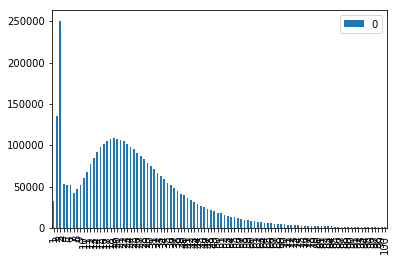

In [19]:
# Look at sentence length distributions
df_sentence_length = pandas.DataFrame.from_dict(stats[5], orient='index')
df_sentence_length[0:100].plot(kind="bar")

We have quite a regular distribution. The spikes at sentences of 2 or 3 words appears to be a quirk of the sentence segmentation algorithm - likely a full-stop in an abbreviation. Or this could also be due to section titles.  

We have a very long tail - some of which may be errors or due to claim language (e.g. one sentence of 34437 words!). 400 words gives us nearly all the distribution and would work as a cut-off.  

An alternative would be to skip the summary of invention section, which contains claim language, which can skew comprehension.

In [20]:
df_sentence_length.describe()

,0
count,635.000000
mean,5863.179528
std,21638.511144
min,1.000000
25%,1.000000
50%,7.000000
75%,120.500000
max,250397.000000


In [21]:
# Looking at number of paragraphs
stats[3]

Counter({5: 1,
         6: 1,
         9: 1,
         10: 4,
         13: 2,
         14: 6,
         15: 8,
         16: 17,
         17: 14,
         18: 22,
         19: 19,
         20: 15,
         21: 23,
         22: 25,
         23: 37,
         24: 31,
         25: 46,
         26: 48,
         27: 40,
         28: 56,
         29: 51,
         30: 73,
         31: 59,
         32: 52,
         33: 78,
         34: 61,
         35: 74,
         36: 61,
         37: 85,
         38: 82,
         39: 81,
         40: 74,
         41: 87,
         42: 87,
         43: 109,
         44: 91,
         45: 98,
         46: 93,
         47: 95,
         48: 85,
         49: 77,
         50: 97,
         51: 85,
         52: 90,
         53: 111,
         54: 86,
         55: 88,
         56: 98,
         57: 96,
         58: 87,
         59: 86,
         60: 68,
         61: 111,
         62: 96,
         63: 81,
         64: 75,
         65: 75,
         66: 94,
         67: 79,
    

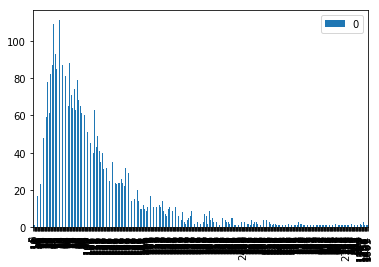

In [22]:
# Look at document paragraph length distributions
df_num_paras = pandas.DataFrame.from_dict(stats[3], orient='index')
df_num_paras.plot(kind="bar")

The number of paragraphs per application also follow a long tail distribution. Any generative model should mirror this distribution.

This appears noisier as we have fewer documents than we do sentences. If we measure more documents this will likely converge.

In [23]:
df_num_paras.describe()

,0
count,563.000000
mean,17.761989
std,26.092571
min,1.000000
25%,1.000000
50%,5.000000
75%,22.000000
max,111.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd7f784400>]], dtype=object)

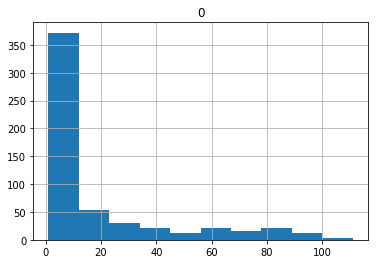

In [24]:
# This is just plotting the distribution of the count numbers not the count indexes
df_num_paras.hist(bins=10)

In [25]:
df_num_paras.max()

0    111
dtype: int64

In [26]:
df_num_paras.hist?